## Matrix Plots

In [1]:
# import seaborn and matplotlib libraries

import seaborn as sns
import matplotlib.pylab as plt


In [2]:
# importing dataset and checking head of the dataset

df=sns.load_dataset("dots")
df.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


In [3]:
# Matrix form for correlation data

df.corr()

,time,coherence,firing_rate
time,1.000000,0.011710,-0.148515
coherence,0.011710,1.000000,-0.127279
firing_rate,-0.148515,-0.127279,1.000000


## heatmap

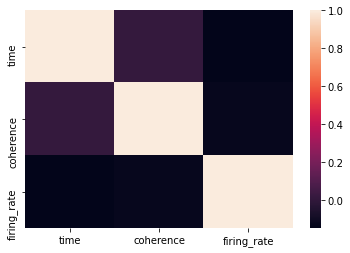

In [4]:
# heatmap for correlation data

sns.heatmap(df.corr())

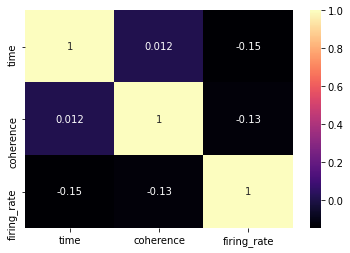

In [5]:
# heatmap for correlation data with cmap magma and annotation.

sns.heatmap(df.corr(), cmap="magma", annot=True)

In [6]:
# importing titanic dataset and  and checking head of the dataset

df1=sns.load_dataset('titanic')
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [54]:
# creating spreadsheet like pivot table

pivottitanic=df1.pivot_table(values='fare',index='pclass',columns='embarked')

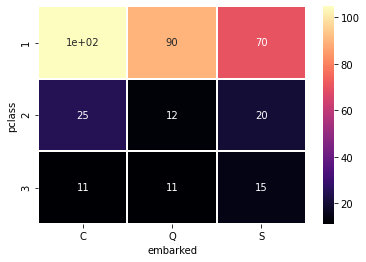

In [9]:
#heatmap for correlation data with cmap magma,annotation, specific linecolor and linewidth.

sns.heatmap(pivottitanic, cmap="magma", annot=True,linecolor='white',linewidths=1)

## clustermap

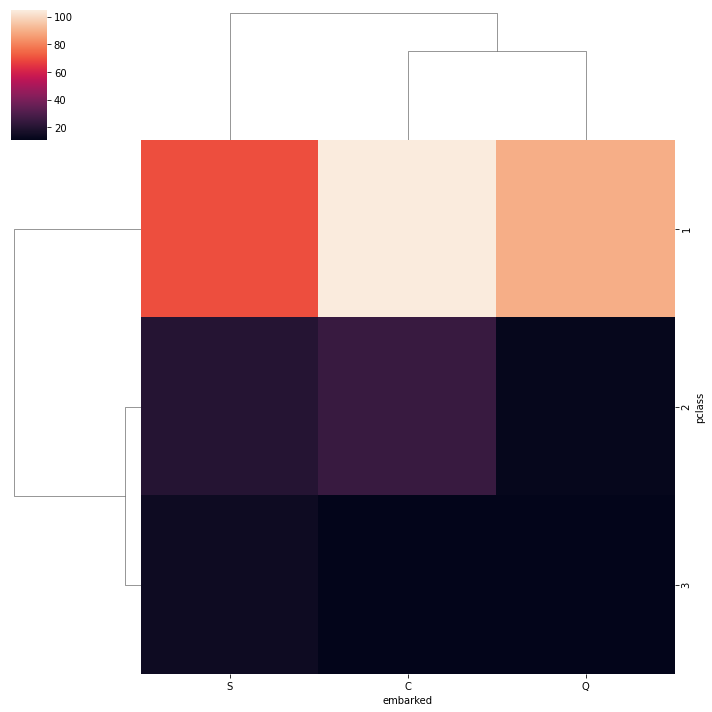

In [10]:
#hierarchical heatmap from matrix dataset(pivot table)

sns.clustermap(pivottitanic)

In [11]:
# importing penguins dataset

pv2=sns.load_dataset('penguins')
pv2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [12]:
# checking the basic stattistics of the dataset

pv2.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# pivot table and heatmap

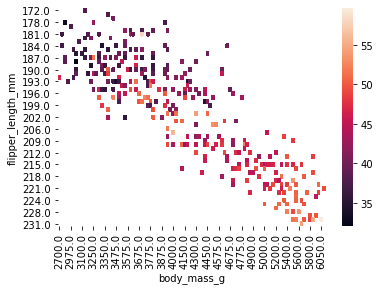

In [13]:
# creating spreadsheet like pivot table
# heatmap for the pivot table

pnguinpivot=pv2.pivot_table(values='bill_length_mm',index='flipper_length_mm',columns='body_mass_g')
sns.heatmap(pnguinpivot)

## PairGrid

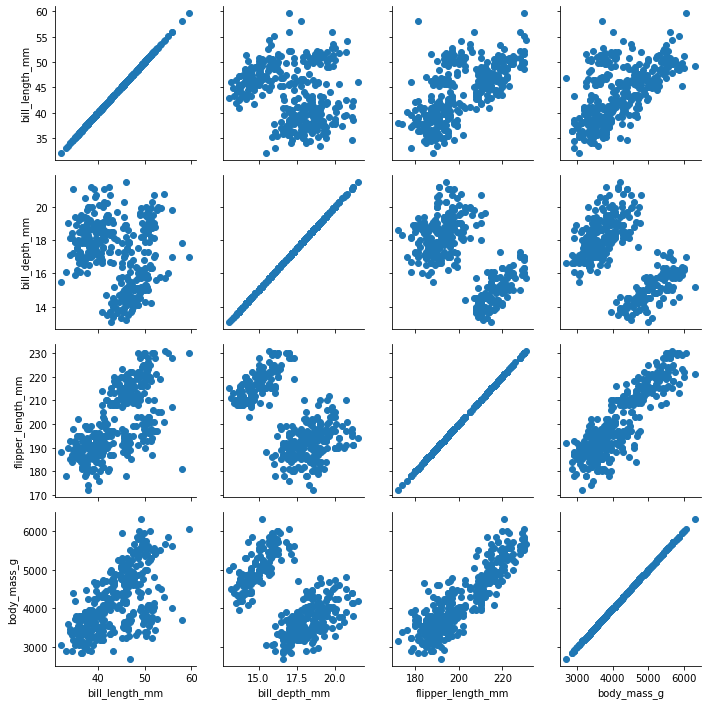

In [14]:
# plotting pairwise relationships in a dataset by scatter plot

paiplt=sns.PairGrid(pv2)
paiplt.map(plt.scatter)

D:\ANACONDA\anacondaa\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\ANACONDA\anacondaa\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


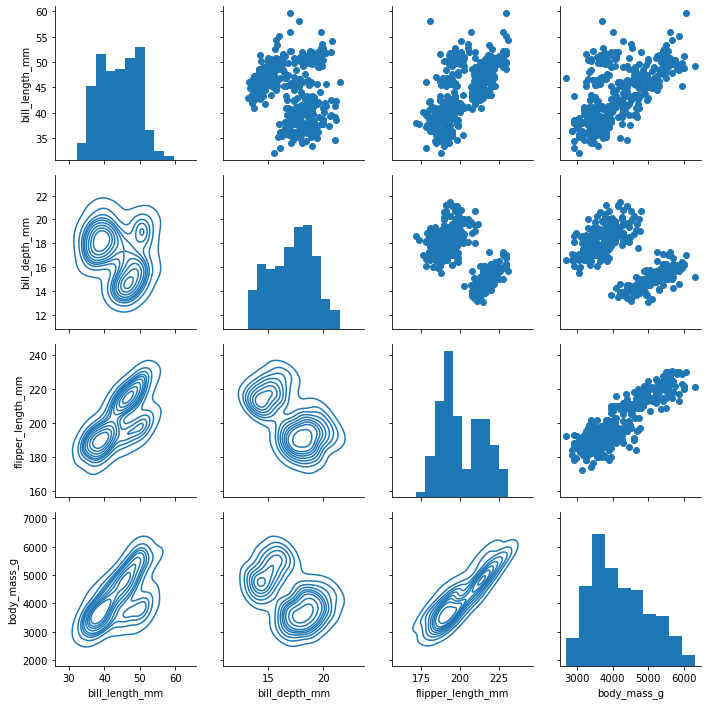

In [15]:
# plotting pairwise relationships in a dataset by different plots.

paiplt=sns.PairGrid(pv2)

paiplt.map_diag(plt.hist)
paiplt.map_upper(plt.scatter)
paiplt.map_lower(sns.kdeplot)

## pairplot

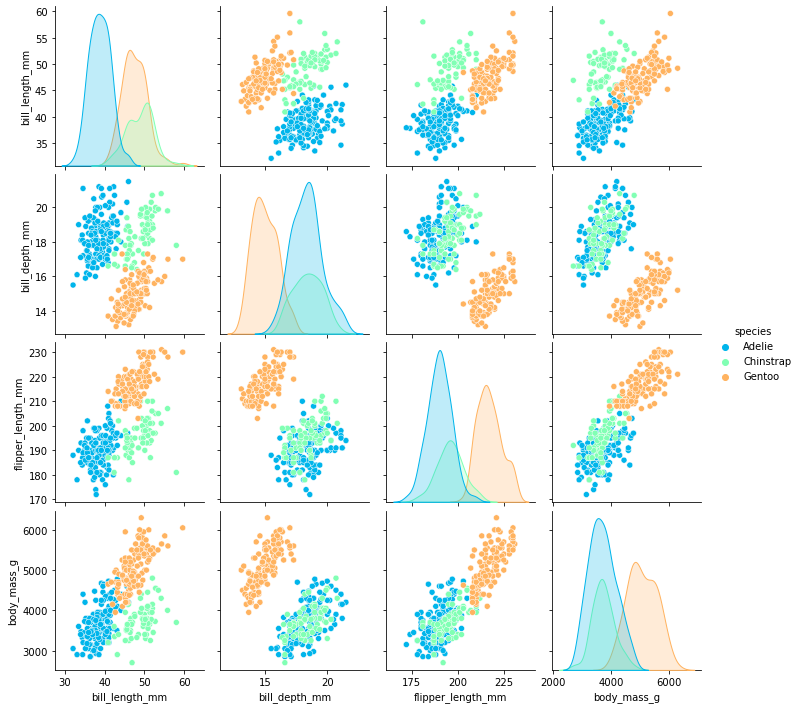

In [16]:
# plotting pairwise relationships in a dataset 

sns.pairplot(pv2,hue='species',palette='rainbow')

## Facet Grid

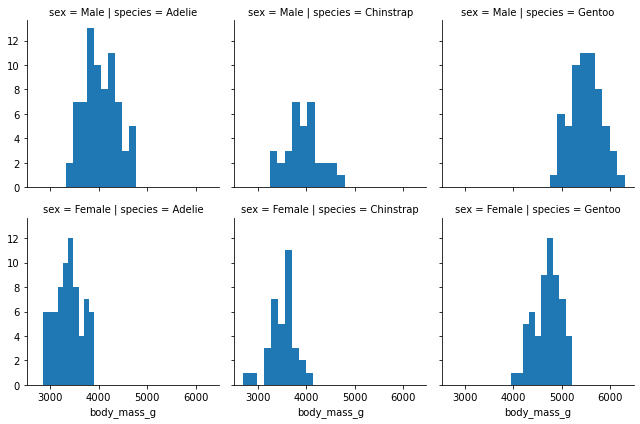

In [17]:
# To draw a plot on every facet, passing a function and the name of one or more columns in the dataframe to FacetGrid.map()

penfacet=sns.FacetGrid(data=pv2, col='species', row='sex')
penfact=penfacet.map(plt.hist, 'body_mass_g')

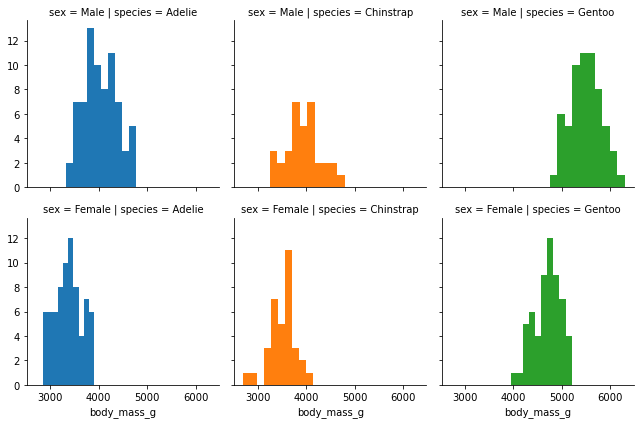

In [18]:
# To draw a plot on every facet, pass a function and the name of one or more columns in the dataframe to FacetGrid.map() 
# with specific hue.

penfacet=sns.FacetGrid(data=pv2, col='species', row='sex', hue='species')
penfact=penfacet.map(plt.hist, 'body_mass_g')

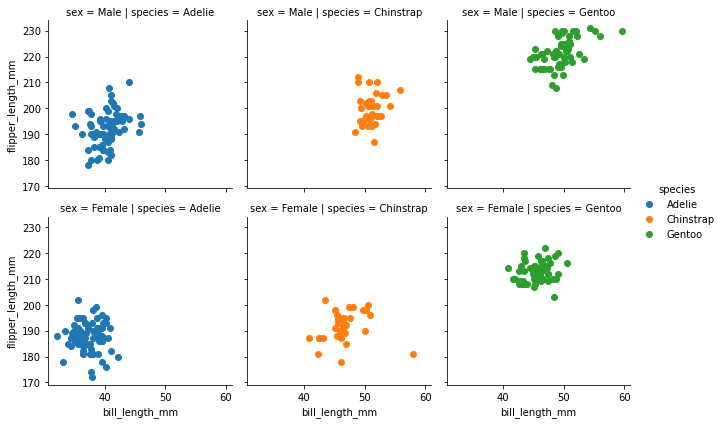

In [24]:
# To draw a plot on every facet with scatter

penfacet=sns.FacetGrid(data=pv2, col='species', row='sex', hue='species')
enfact=penfacet.map(plt.scatter, 'bill_length_mm','flipper_length_mm').add_legend()

# kde plot

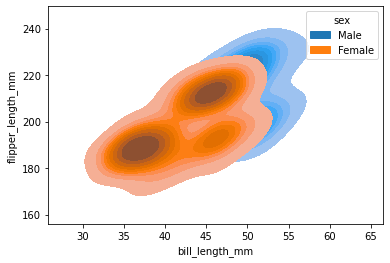

In [30]:
# Ploting bivariate distributions using kernel density estimation(kde): contour

sns.kdeplot(data=pv2, x='bill_length_mm',y='flipper_length_mm', hue="sex", fill=True)

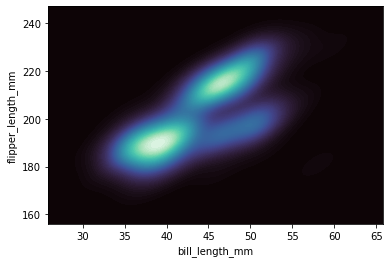

In [31]:
# Filling the axes extent with a smooth distribution, using a different colormap

sns.kdeplot(data=pv2, x='bill_length_mm',y='flipper_length_mm', thresh=0, levels=100, cmap="mako", fill=True)

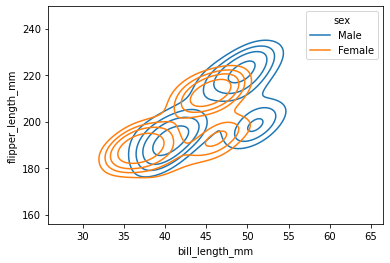

In [33]:
# showing the contour levels, covering less of the distribution

sns.kdeplot(data=pv2, x='bill_length_mm',y='flipper_length_mm', levels=5, thresh=.2,hue="sex",)

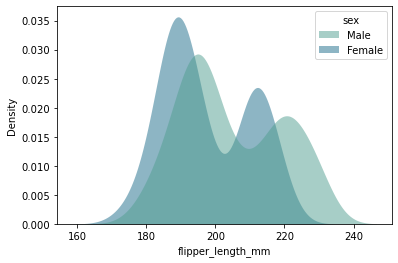

In [36]:
# hue maping by modifying the appearance of the plot

sns.kdeplot(data=pv2, x='flipper_length_mm', common_norm=False,  fill=True, palette="crest", alpha=.5, linewidth=0, hue="sex",)

## joint Grid

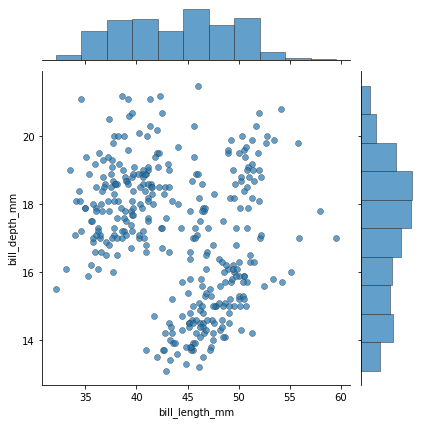

In [20]:
# Grid for drawing a bivariate plot (scatter and hist)

g = sns.JointGrid(data=pv2, x="bill_length_mm", y="bill_depth_mm")
g.plot(sns.scatterplot, sns.histplot, alpha=.7, edgecolor=".2", linewidth=.5)

## joint plot

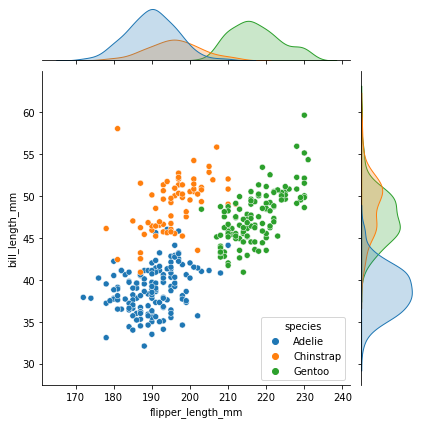

In [21]:
#Assigning a hue variable will add conditional colors to the scatterplot and draw separate density
#curves (using kdeplot()) on the marginal axes:

sns.jointplot(data=pv2, x="flipper_length_mm", y="bill_length_mm", hue="species")

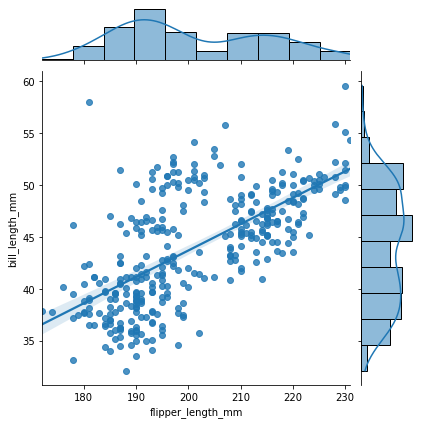

In [39]:
# Seting kind="reg" to add a linear regression fit (using regplot()) and univariate KDE curves

sns.jointplot(data=pv2, x="flipper_length_mm", y="bill_length_mm",  kind='reg')

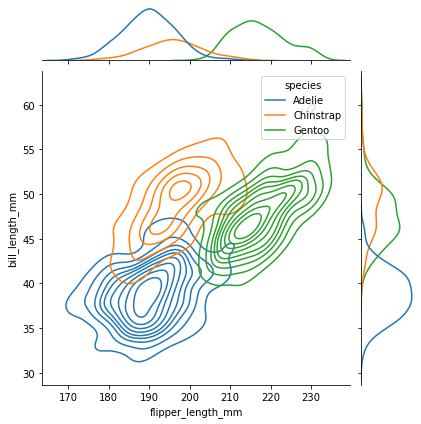

In [40]:
# Several different approaches to plotting are available through the kind parameter. Setting kind="kde" will draw both 
# bivariate and univariate KDEs

sns.jointplot(data=pv2, x="flipper_length_mm", y="bill_length_mm", hue="species", kind="kde")

## Regression Plots

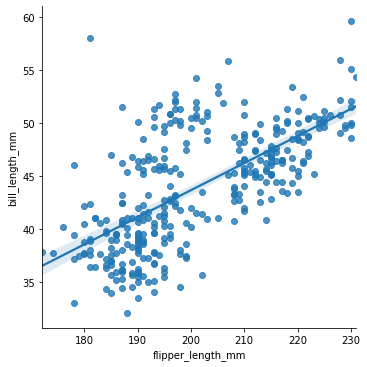

In [44]:
# fitting the regression line

sns.lmplot(data=pv2, x="flipper_length_mm", y="bill_length_mm", )

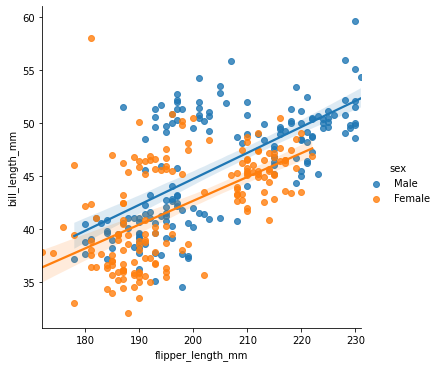

In [45]:
# Plotting the data and regression model fits across a FacetGrid with hue='sex'

sns.lmplot(data=pv2, x="flipper_length_mm", y="bill_length_mm", hue='sex')

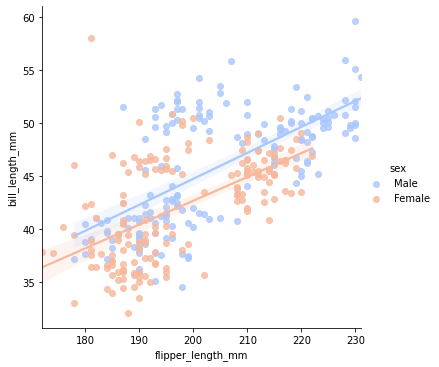

In [46]:
# potting the data and regression model fits across a FacetGrid with palette='coolwarm'

sns.lmplot(data=pv2, x="flipper_length_mm", y="bill_length_mm", hue='sex', palette='coolwarm')

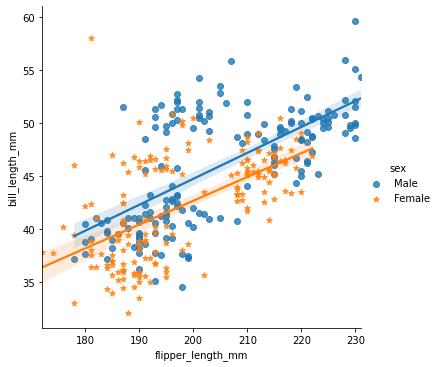

In [48]:
# potting the data and regression model fits across a FacetGrid with different marker 

sns.lmplot(data=pv2, x="flipper_length_mm", y="bill_length_mm", hue='sex', markers=['o','*'])

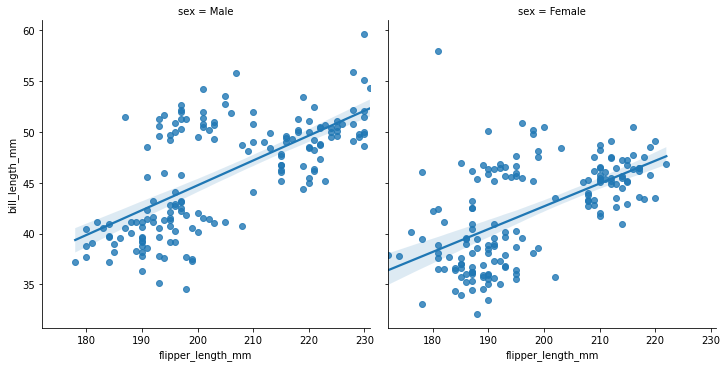

In [49]:
# # potting the data and regression model fits across a FacetGrid according to sex

sns.lmplot(data=pv2, x="flipper_length_mm", y="bill_length_mm", col='sex')

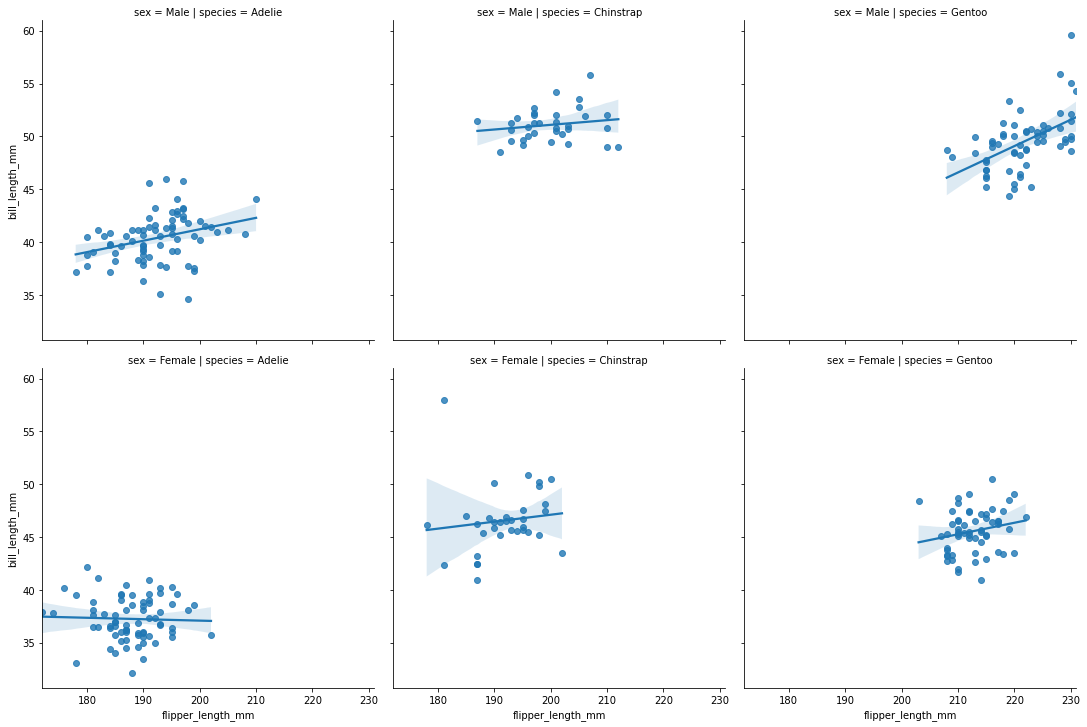

In [52]:
# potting the data and regression model fits across a FacetGrid with specific row and column

sns.lmplot(data=pv2, x="flipper_length_mm", y="bill_length_mm", row='sex', col='species')

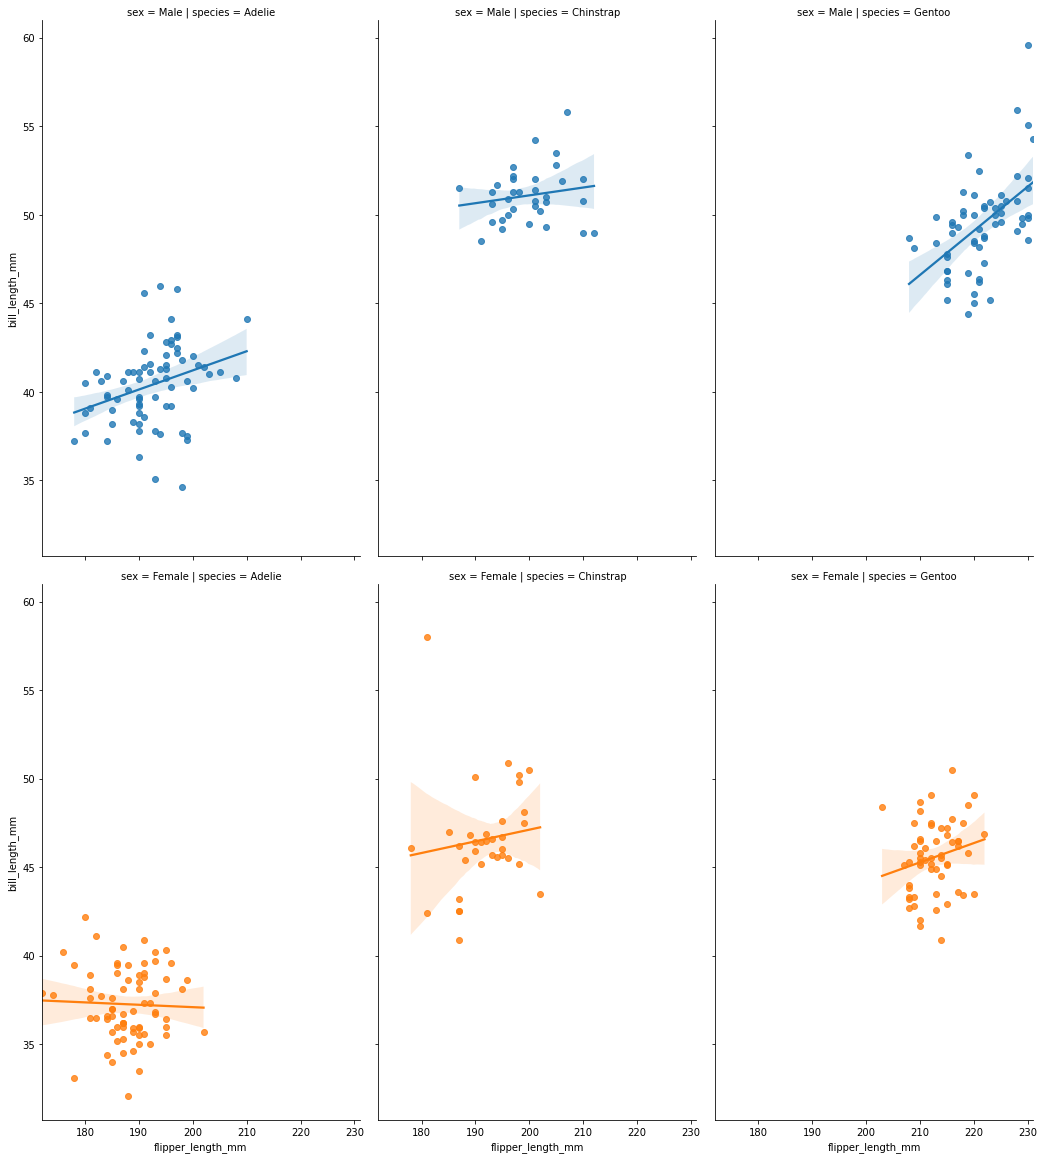

In [55]:
# # potting the data and regression model fits across a FacetGrid with specific row and column with different aspect and size.

sns.lmplot(data=pv2, x="flipper_length_mm", y="bill_length_mm", row='sex', col='species',hue='sex',aspect=0.6,height=8)